In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import plotly.express as px
import plotly.graph_objects as go

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('agedeath.dat.txt', sep = '\s+', names = ['type', 'age', 'index'])
data.head()

,type,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [3]:
data.isna().sum()

type     0
age      0
index    0
dtype: int64

In [4]:
data['age'].describe()

count    6186.000000
mean       57.675558
std        17.503980
min        21.000000
25%        45.000000
50%        60.000000
75%        71.000000
max       102.000000
Name: age, dtype: float64

In [5]:
data['type'].describe()

count     6186
unique       3
top       gent
freq      2455
Name: type, dtype: object

In [6]:
data['type'].unique()

array(['aris', 'gent', 'sovr'], dtype=object)

- gent - дворянин
- aris - аристократ 
- sovr - королі/імператори

- Чи впливає становище в суспільстві на тривалість життя?

- В даному наборі даних ми можемо зазначити 3 незалежні між собою вибірки, тобто дворянин != аристократ != король, тому необхідно використати дисперсійний односторонній аналіз для визначення правильності наведеної гіпотези.


- $H_0$ - тривалість життя не залежить від статусу
- $H_1$ - тривалість життя залежить від статусу

In [7]:
x = data[data['type']=='gent']['age']
y = data[data['type'] == 'aris']['age']
z = data[data['type'] == 'sovr']['age']

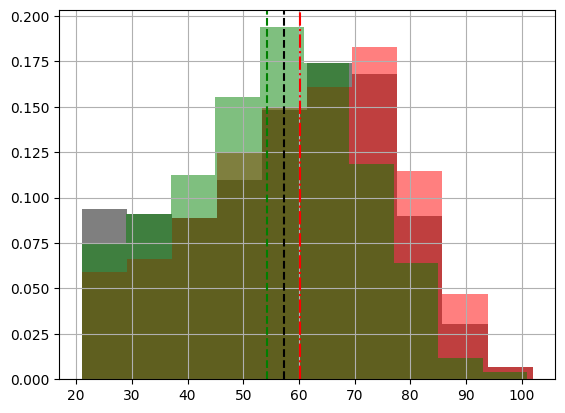

In [8]:
x.hist(alpha = 0.5, weights = [1/len(x)]*len(x), color = 'black')
y.hist(alpha = 0.5, weights = [1/len(y)]*len(y), color = 'red')
z.hist(alpha = 0.5, weights = [1/len(z)]*len(z), color = 'green')
plt.axvline(x.mean(), color = 'black', ls='--')
plt.axvline(y.mean(), color = 'red', ls='dashdot')
plt.axvline(z.mean(), color = 'green', ls='--')

In [9]:
anova = scipy.stats.f_oneway(x, y, z)
anova

F_onewayResult(statistic=53.76192516565296, pvalue=7.115201770216959e-24)

In [13]:
encoder = LabelEncoder()

In [14]:
data.type = encoder.fit_transform(data['type'])

In [15]:
name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [16]:
name_mapping

{'aris': 0, 'gent': 1, 'sovr': 2}

In [11]:
scaler = StandardScaler()

In [17]:
data_scaler = scaler.fit_transform(data)

In [18]:
data_scaler = pd.DataFrame(data_scaler)

In [19]:
data_scaler.columns = data.columns

In [20]:
data_scaler.head(3)

,type,age,index
0,-1.128339,-2.095439,-1.622336
1,-1.128339,-2.095439,-1.620831
2,-1.128339,-2.095439,-1.619327


In [21]:
pca = PCA(n_components=2, random_state=42)

In [23]:
data_tranform_2D = pca.fit_transform(data_scaler)

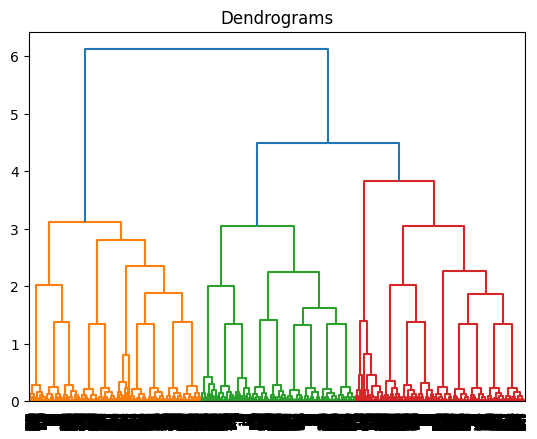

In [46]:
Z = hierarchy.linkage(data_scaler, method='average')
  
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)

In [29]:
clusters = []
inertials = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaler)
    
    clusters.append(k)
    inertials.append(kmeans.inertia_)

Text(0, 0.5, 'Inertai')

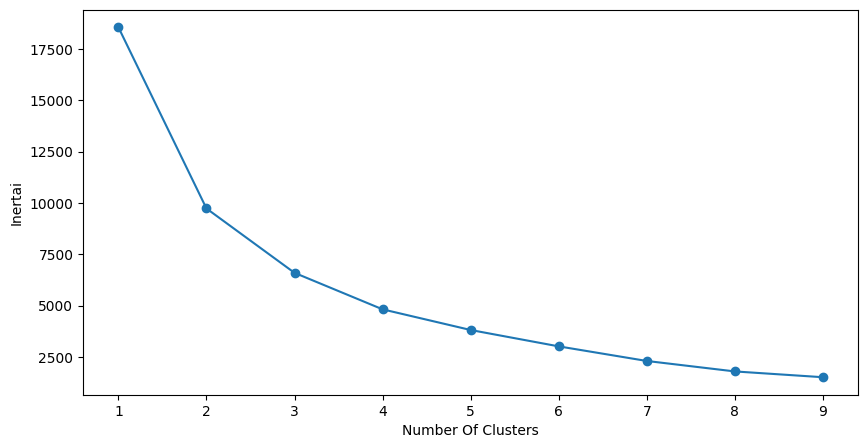

In [37]:
fig = plt.subplots(figsize = (10, 5))
plt.plot(clusters, inertials, 'o-')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertai')

In [36]:
silhouette_scores = []
calinskii_score = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaler)
    silhouette_avg = silhouette_score(data_scaler, kmeans.labels_)
    calin_score = calinski_harabasz_score(data_scaler, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    calinskii_score.append(calin_score)

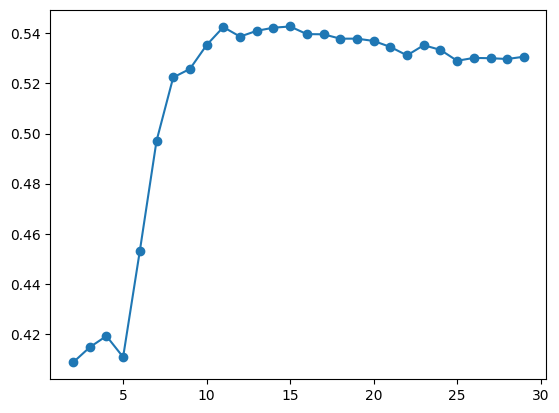

In [39]:
plt.plot(range(2, 30), silhouette_scores, 'o-')

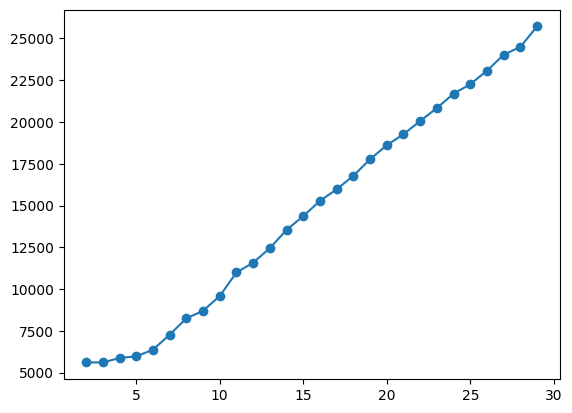

In [40]:
plt.plot(range(2, 30), calinskii_score, 'o-')

In [41]:
k_mean = KMeans(n_clusters = 11)

In [42]:
k_mean.fit(data)

KMeans(n_clusters=11)

In [43]:
data_scaler['k_means_11'] = k_mean.labels_

In [45]:
data_scaler.head()

,type,age,index,k_means_11
0,-1.128339,-2.095439,-1.622336,6
1,-1.128339,-2.095439,-1.620831,6
2,-1.128339,-2.095439,-1.619327,6
3,-1.128339,-2.095439,-1.617823,6
4,-1.128339,-2.095439,-1.616319,6


In [50]:
labels = k_mean.labels_

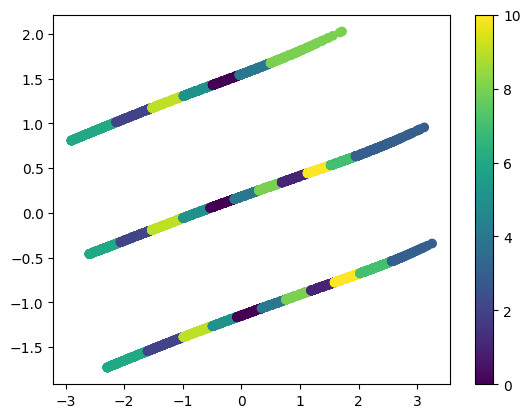

In [51]:
plt.scatter(data_tranform_2D[:, 0], data_tranform_2D[:, 1], c=labels, cmap='viridis')
plt.colorbar()

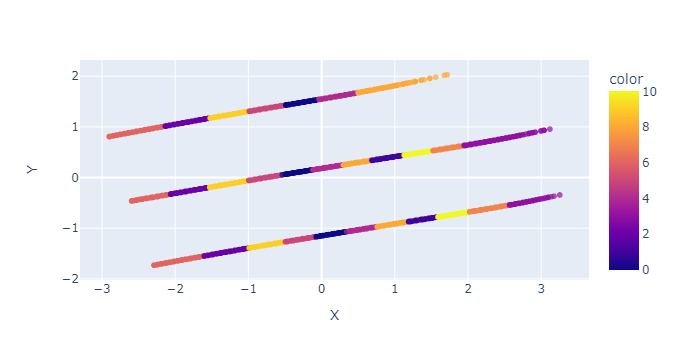

In [54]:
fig = px.scatter(
    x=data_tranform_2D[:, 0], y=data_tranform_2D[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},)

fig.show()